## CASE STUDY 2: Credit Card Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [2]:
cust_acq = pd.read_csv('Customer Acqusition.csv')
spend = pd.read_csv('spend.csv')
repayment = pd.read_csv('Repayment.csv')

In [3]:
cust_acq.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [4]:
cust_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [5]:
cust_acq.shape

(100, 8)

In [6]:
spend.head(1)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.8


In [7]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [8]:
spend['Month'] = pd.to_datetime(spend['Month'], format = '%d-%b-%y')

In [9]:
spend.head(1)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.8


In [10]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [11]:
spend.shape

(1500, 5)

In [12]:
repayment.head(3)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN


In [13]:
repayment = repayment.loc[ : , ~repayment.columns.str.contains('^Unnamed')]
repayment

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1518,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN


In [14]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SL No:    1499 non-null   float64
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(2), object(2)
memory usage: 47.7+ KB


In [15]:
repayment.loc[ : , 'Month'] = pd.to_datetime(repayment['Month'], format = '%d-%b-%y')

In [16]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1499 non-null   float64       
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 47.7+ KB


In [17]:
repayment.head(1)

,SL No:,Customer,Month,Amount
0,NaN,A1,2004-01-12,495414.75


In [18]:
repayment.shape

(1523, 4)

### 1. In the above dataset,

#### a. In case age is less than 18, replace it with mean of age values.

In [19]:
cust_acq[cust_acq.Age < 18]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,63,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [20]:
cust_acq.Age.mean()

46.49

In [21]:
cust_acq.loc[cust_acq.Age < 18, 'Age'] = cust_acq.Age.mean()
cust_acq.head(15)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.00,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.00,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.00,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.00,BANGALORE,Platimum,10002.0,C5,Normal Salary
5,6,A6,70.00,DELHI,Silver,100000.0,C6,Self Employed
6,7,A7,26.00,COCHIN,Silver,100001.0,C7,Salaried_MNC
7,8,A8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9,A9,79.00,CHENNAI,Silver,100003.0,C9,Govt
9,10,A10,54.00,CALCUTTA,Gold,500000.0,C10,Normal Salary


#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [22]:
cust_spend = pd.merge(left = spend, right = cust_acq, how = 'left', on = 'Customer')
cust_spend

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [23]:
cust_spend[cust_spend.Amount > cust_spend.Limit]

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
7,8,A8,2004-02-05,BIKE,155562.58,8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
18,19,A19,2005-04-04,FOOD,441442.26,19,27.00,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt
19,20,A20,2006-04-30,JEWELLERY,356733.48,20,27.00,CALCUTTA,Platimum,10001.0,C20,Govt
20,21,A21,2004-04-25,PETRO,190011.63,21,57.00,COCHIN,Platimum,10002.0,C21,Normal Salary
21,22,A22,2006-04-19,CLOTHES,423672.50,22,27.00,BOMBAY,Silver,100000.0,C22,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1486,A59,2004-01-15,FOOD,181115.20,59,74.00,BANGALORE,Silver,100003.0,C21,Normal Salary
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [24]:
cust_spend.loc[cust_spend.Amount > cust_spend.Limit, 'Amount'] = (0.50*cust_spend.Limit)
cust_spend.head(10)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,2004-01-25,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
5,6,A1,2005-02-23,SANDALS,168285.60,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
6,7,A1,2005-02-01,CAR,23370.20,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
7,8,A8,2004-02-05,BIKE,50001.00,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9,A9,2005-02-28,AUTO,38269.94,9,79.0,CHENNAI,Silver,100003.0,C9,Govt
9,10,A10,2005-02-16,SHOPPING,194795.88,10,54.0,CALCUTTA,Gold,500000.0,C10,Normal Salary


#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [25]:
cust_repay = pd.merge(left = repayment, right = cust_acq, how = 'left', on = 'Customer')
cust_repay

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,2004-01-12,495414.75,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,2004-01-03,245899.02,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,2004-01-15,259490.06,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,2004-01-25,437555.12,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,2005-01-17,165972.88,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1518,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
cust_repay[cust_repay.Amount > cust_repay.Limit]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
7,8.0,A8,2004-02-05,156913.59,8.0,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9.0,A9,2005-02-28,417294.81,9.0,79.00,CHENNAI,Silver,100003.0,C9,Govt
17,18.0,A18,2006-03-05,213352.06,18.0,34.00,BANGALORE,Silver,100000.0,C18,Salaried_MNC
18,19.0,A19,2005-04-04,347826.27,19.0,27.00,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt
19,20.0,A20,2006-04-30,471099.22,20.0,27.00,CALCUTTA,Platimum,10001.0,C20,Govt
...,...,...,...,...,...,...,...,...,...,...,...
1483,1484.0,A57,2004-03-19,207786.09,57.0,37.00,TRIVANDRUM,Silver,100001.0,C19,Normal Salary
1496,1497.0,A68,2006-05-10,319836.49,68.0,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498.0,A69,2006-07-11,247628.45,69.0,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499.0,A70,2005-08-12,454016.51,70.0,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [27]:
cust_repay.loc[cust_repay.Amount > cust_repay.Limit, 'Amount'] = cust_repay.Limit
cust_repay.head(10)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,2004-01-12,495414.75,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,2004-01-03,245899.02,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,2004-01-15,259490.06,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,2004-01-25,437555.12,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,2005-01-17,165972.88,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
5,6.0,A1,2005-02-23,365366.62,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
6,7.0,A1,2005-02-01,14473.41,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
7,8.0,A8,2004-02-05,100002.00,8.0,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9.0,A9,2005-02-28,100003.00,9.0,79.0,CHENNAI,Silver,100003.0,C9,Govt
9,10.0,A10,2005-02-16,48759.19,10.0,54.0,CALCUTTA,Gold,500000.0,C10,Normal Salary


### 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [28]:
cust_acq.Customer.nunique()

100

#### b. How many distinct categories exist?

In [29]:
cust_acq.Segment.value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

#### c. What is the average monthly spend by customers?

In [30]:
spend.groupby(pd.PeriodIndex(spend['Month'], freq = 'M')).Amount.mean()

Month
2004-01    251712.068664
2004-02    221215.270000
2004-03    232146.119286
2004-04    235272.037143
2004-05    217539.236429
2004-09    310923.383571
2004-11    270486.397857
2005-01    292741.372857
2005-02    229802.279821
2005-04    252181.326429
2005-05    245696.515429
2005-06    262688.112857
2005-07    229116.663571
2005-08    233734.634286
2005-09    188666.202143
2005-10    194568.640714
2005-11    286143.322857
2005-12    147503.060000
2006-01    282058.006429
2006-02    253858.260714
2006-03    247166.084654
2006-04    232468.967553
2006-05    236162.740357
2006-06    177252.386429
2006-07    287505.098929
2006-08    240699.717143
2006-09    158520.090714
2006-10    236136.335000
2006-11    182841.290000
2006-12    270470.980714
Freq: M, Name: Amount, dtype: float64

#### d. What is the average monthly repayment by customers?

In [31]:
repayment.groupby(pd.PeriodIndex(repayment['Month'], freq = 'M')).Amount.mean()

Month
2004-01    243489.649786
2004-02    256702.630741
2004-03    252585.280667
2004-04    259141.679000
2004-05    226162.720800
2004-09    184487.848750
2004-11    209592.238000
2005-01    240548.098148
2005-02    238829.265123
2005-04    212688.631333
2005-05    263207.367857
2005-06    210199.818333
2005-07    239871.479167
2005-08    264430.921622
2005-09    247700.170000
2005-10    219849.956667
2005-11    256695.120000
2005-12    320379.335833
2006-01    293475.389167
2006-02    284489.565128
2006-03    240851.266814
2006-04    275472.251889
2006-05    256920.884943
2006-06    251990.453333
2006-07    257936.383243
2006-08    224143.992500
2006-09    262533.880833
2006-10    260765.480000
2006-11    199399.197407
2006-12    252736.569167
Freq: M, Name: Amount, dtype: float64

#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [32]:
cust_spend_repay = pd.merge(left = cust_spend, right = repayment, how = 'inner', on = 'Customer')
cust_spend_repay.head()

,Sl No:,Customer,Month_x,Type,Amount_x,No,Age,City,Product,Limit,Company,Segment,SL No:,Month_y,Amount_y
0,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75
1,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02
2,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06
3,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12
4,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88


In [33]:
spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46


In [34]:
repayment.head(3)

,SL No:,Customer,Month,Amount
0,NaN,A1,2004-01-12,495414.75
1,2.0,A1,2004-01-03,245899.02
2,3.0,A1,2004-01-15,259490.06


In [35]:
cust_spend_repay.rename(columns = {'Amount_x' : 'Spend_Amount', 'Amount_y' : 'Repay_Amount', 'Month_x' : 'Spend_Month', 'Month_y': 'Repay_Month'}, inplace = True)

In [36]:
cust_spend_repay.head(3)

,Sl No:,Customer,Spend_Month,Type,Spend_Amount,No,Age,City,Product,Limit,Company,Segment,SL No:,Repay_Month,Repay_Amount
0,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75
1,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02
2,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06


In [37]:
cust_spend_repay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sl No:        37284 non-null  int64         
 1   Customer      37284 non-null  object        
 2   Spend_Month   37284 non-null  datetime64[ns]
 3   Type          37284 non-null  object        
 4   Spend_Amount  37284 non-null  float64       
 5   No            37284 non-null  int64         
 6   Age           37284 non-null  float64       
 7   City          37284 non-null  object        
 8   Product       37284 non-null  object        
 9   Limit         37284 non-null  float64       
 10  Company       37284 non-null  object        
 11  Segment       37284 non-null  object        
 12  SL No:        37266 non-null  float64       
 13  Repay_Month   37284 non-null  datetime64[ns]
 14  Repay_Amount  37284 non-null  float64       
dtypes: datetime64[ns](2), float64(5), in

In [38]:
cust_spend_repay['Monthly'] = cust_spend_repay['Repay_Month'].apply(lambda x : x.month)
cust_spend_repay['Yearly'] = cust_spend_repay['Repay_Month'].apply(lambda x : x.year)

In [39]:
cust_spend_repay.head(3)

,Sl No:,Customer,Spend_Month,Type,Spend_Amount,No,Age,City,Product,Limit,Company,Segment,SL No:,Repay_Month,Repay_Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,1,2004
1,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,1,2004
2,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06,1,2004


In [40]:
group = cust_spend_repay.groupby(['Yearly', 'Monthly'])[['Spend_Amount', 'Repay_Amount']].sum()
group

Spend_Amount  Repay_Amount
Yearly Monthly                            
2004   1        1.088357e+09  1.699210e+09
       2        7.613922e+07  1.602419e+08
       3        5.594171e+07  8.974470e+07
       4        1.194516e+08  2.285403e+08
       5        8.800456e+07  1.411594e+08
       9        5.144278e+07  8.016122e+07
       11       5.504612e+07  7.860290e+07
2005   1        1.324129e+08  1.810333e+08
       2        5.890557e+08  9.416163e+08
       4        9.366405e+07  1.747894e+08
       5        7.149030e+08  1.099197e+09
       6        1.174019e+08  2.213774e+08
       7        3.995653e+07  7.997268e+07
       8        1.361400e+08  2.477449e+08
       9        3.195551e+07  7.530449e+07
       10       3.140993e+07  6.027830e+07
       11       1.532278e+08  2.763119e+08
       12       4.348638e+07  9.944533e+07
2006   1        5.127574e+07  8.974491e+07
       2        1.654843e+08  2.903280e+08
       3        7.393854e+08  1.115725e+09
       4        3.229722e+08  6.093666e+08
       5        3.297954e+08  5.434823e+08
       6        5.302118e+07  6.914431e+07
       7        1.444093e+08  2.245720e+08
       8        5.849630e+07  7.167032e+07
       9        5.395681e+07  8.083199e+07
       10       5.285823e+07  7.890924e+07
       11       1.124836e+08  1.355832e+08
       12       4.585222e+07  7.087702e+07

In [41]:
group['Monthly_Profit'] = group['Repay_Amount'] - group['Spend_Amount']
group.head(3)

Spend_Amount  Repay_Amount  Monthly_Profit
Yearly Monthly                                            
2004   1        1.088357e+09  1.699210e+09    6.108525e+08
       2        7.613922e+07  1.602419e+08    8.410268e+07
       3        5.594171e+07  8.974470e+07    3.380298e+07

In [42]:
group['Profit'] = group['Monthly_Profit']*0.029
group.head()

Spend_Amount  Repay_Amount  Monthly_Profit        Profit
Yearly Monthly                                                          
2004   1        1.088357e+09  1.699210e+09    6.108525e+08  1.771472e+07
       2        7.613922e+07  1.602419e+08    8.410268e+07  2.438978e+06
       3        5.594171e+07  8.974470e+07    3.380298e+07  9.802865e+05
       4        1.194516e+08  2.285403e+08    1.090887e+08  3.163572e+06
       5        8.800456e+07  1.411594e+08    5.315485e+07  1.541491e+06

#### f. What are the top 5 product types?

In [43]:
spend.Type.value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

#### g. Which city is having maximum spend?

In [44]:
cust_spend.groupby('City').Amount.sum().sort_values(ascending =False).head(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

#### h. Which age group is spending more money?

In [45]:
cust_spend['Age_Group'] = pd.cut(cust_spend.Age, range(18, 80, 10) , include_lowest = True)

In [46]:
cust_spend.head()

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Age_Group
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]"
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]"
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]"
3,4,A1,2004-01-25,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]"
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]"


In [47]:
cust_spend.groupby('Age_Group').Amount.sum().sort_values(ascending = False).head(1)

Age_Group
(38.0, 48.0]    52350765.92
Name: Amount, dtype: float64

#### i. Who are the top 10 customers in terms of repayment?

In [48]:
cust_repay.groupby('Customer').Amount.sum().sort_values(ascending = False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [49]:
cust_spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Sl No:     1500 non-null   int64         
 1   Customer   1500 non-null   object        
 2   Month      1500 non-null   datetime64[ns]
 3   Type       1500 non-null   object        
 4   Amount     1500 non-null   float64       
 5   No         1500 non-null   int64         
 6   Age        1500 non-null   float64       
 7   City       1500 non-null   object        
 8   Product    1500 non-null   object        
 9   Limit      1500 non-null   float64       
 10  Company    1500 non-null   object        
 11  Segment    1500 non-null   object        
 12  Age_Group  1482 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 186.4+ KB


In [50]:
cust_spend.head(3)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Age_Group
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]"
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]"
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]"


In [51]:
cust_spend['Monthly'] = cust_spend['Month'].apply(lambda x : x.month)
cust_spend['Yearly'] = cust_spend['Month'].apply(lambda x : x.year)

In [52]:
cust_spend.head(3)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Age_Group,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]",1,2004
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]",1,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,"(68.0, 78.0]",1,2004


In [53]:
cust_spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Sl No:     1500 non-null   int64         
 1   Customer   1500 non-null   object        
 2   Month      1500 non-null   datetime64[ns]
 3   Type       1500 non-null   object        
 4   Amount     1500 non-null   float64       
 5   No         1500 non-null   int64         
 6   Age        1500 non-null   float64       
 7   City       1500 non-null   object        
 8   Product    1500 non-null   object        
 9   Limit      1500 non-null   float64       
 10  Company    1500 non-null   object        
 11  Segment    1500 non-null   object        
 12  Age_Group  1482 non-null   category      
 13  Monthly    1500 non-null   int64         
 14  Yearly     1500 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 209.8+ K

In [54]:
summ = pd.pivot_table(data = cust_spend, index = ['Yearly', 'City'], columns = 'Product', values = 'Amount', aggfunc = 'sum')
summ

Product                   Gold    Platimum      Silver
Yearly City                                           
2004   BANGALORE    9289878.54  1112732.30  1291852.58
       BOMBAY       6987853.53   897264.94   532089.03
       CALCUTTA     7477140.98  2037690.30   500006.00
       CHENNAI      1059618.50  3535652.38   282056.86
       COCHIN       7315850.15  3419904.07   814229.62
       DELHI        2806495.00   283512.89   768172.30
       PATNA        2072567.90  1113069.60   756684.10
       TRIVANDRUM   2415102.84  2161676.67   209667.48
2005   BANGALORE   12892362.99   912284.97   830612.34
       BOMBAY       8983018.28   711804.94   508988.54
       CALCUTTA    10303355.80  4434696.31   440147.06
       CHENNAI      3740945.58  5053956.32   377184.49
       COCHIN      12110613.03  4960921.71   652269.38
       DELHI        1964845.27   494157.86   612311.21
       PATNA        3252615.77  2883231.07   950094.19
       TRIVANDRUM   1240375.85  3601443.30   269912.99
2006   BANGALORE   12030611.09   685831.27  1415480.94
       BOMBAY       7917144.31   972130.01  1092833.80
       CALCUTTA    11167532.77  3589606.66  1157956.42
       CHENNAI      2704288.62  5024923.40   350009.50
       COCHIN      10499142.38  4920592.29  1269990.87
       DELHI        2957103.32   176788.72   854899.97
       PATNA        2276181.69  1256137.65   700005.00
       TRIVANDRUM   2735710.87  2147403.75   555862.12

<AxesSubplot:xlabel='Yearly,City'>

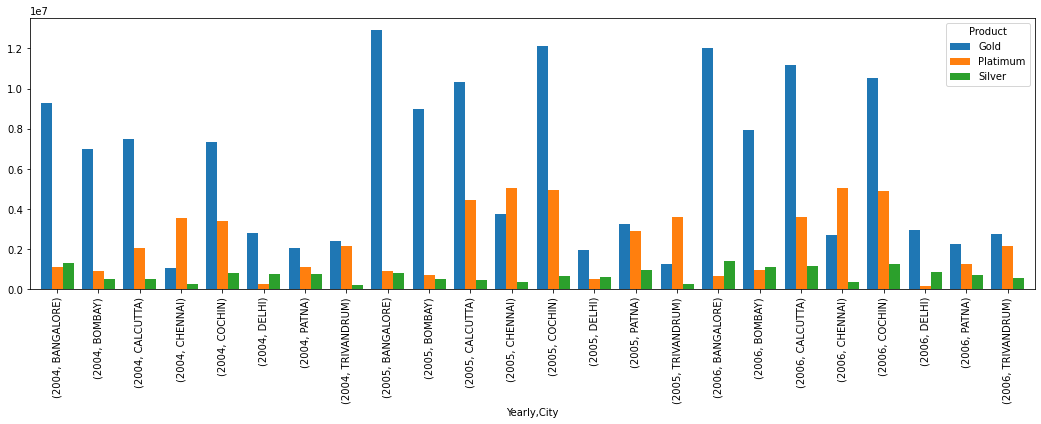

In [55]:
summ.plot(kind = 'bar', figsize=(18,5),width=0.8)

### 4. Create graphs for

#### a. Monthly comparison of total spends, city wise

In [56]:
summ2 = pd.pivot_table(data = cust_spend, index = 'City', columns = 'Monthly', values = 'Amount', aggfunc = 'sum')
summ2

Monthly,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,9041796.84,6734494.76,5362903.07,4207980.48,6383115.13,1330685.90,2228217.69,695061.95,703018.28,1091602.61,2260603.07,422167.24
BOMBAY,5948993.33,4276988.30,5227850.50,1873785.01,3891945.60,1172594.97,177726.32,1066744.75,1278402.79,676005.70,2872049.40,140040.71
CALCUTTA,9064864.90,8150545.61,4939040.04,3457507.95,5578246.87,2293045.81,2234573.27,1548354.02,1511713.57,196357.83,2078880.93,55001.50
CHENNAI,4466961.36,4385815.95,3183643.71,2518656.99,2856199.62,1244242.16,693825.77,305875.97,745759.40,156247.17,1347779.28,223628.27
COCHIN,11714373.54,5747886.38,5645146.53,3882744.94,6581085.69,2495745.07,1290897.30,2317306.61,1382242.90,868551.89,3127999.60,909533.05
DELHI,2714261.45,1494064.06,2267149.02,777240.75,1600322.07,511276.09,50001.50,155402.16,50001.00,64615.46,391610.96,842342.02
PATNA,4916205.55,2353333.55,1437166.61,2338179.53,2136586.80,746186.13,50000.00,419383.64,70329.95,329537.34,413677.87,50000.00
TRIVANDRUM,3704336.99,2857123.89,2392316.51,1199293.45,2813534.48,400336.83,260484.50,453773.94,186063.70,285581.92,143387.40,640922.26


<AxesSubplot:xlabel='City'>

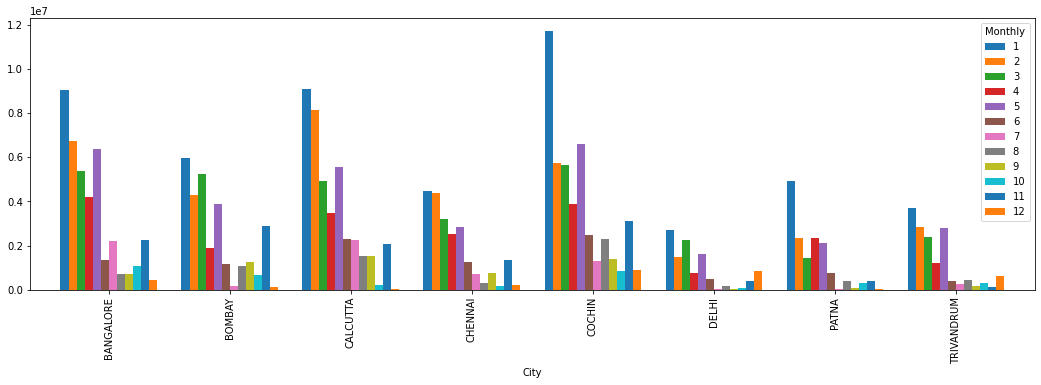

In [57]:
summ2.plot(kind = 'bar', figsize=(18,5),width=0.8)

#### b. Comparison of yearly spend on air tickets

In [58]:
filtered = cust_spend.groupby(['Type', 'Yearly']).Amount.sum().reset_index()
filtered

,Type,Yearly,Amount
0,AIR TICKET,2004,4357225.35
1,AIR TICKET,2005,10550152.21
2,AIR TICKET,2006,5248469.56
3,AUTO,2004,254745.28
4,AUTO,2005,1192725.78
5,AUTO,2006,3358589.35
6,BIKE,2004,476635.28
7,BIKE,2005,4228406.18
8,BIKE,2006,2304748.07
9,BUS TICKET,2004,5822074.21


In [59]:
airtickets = filtered.loc[filtered.Type == 'AIR TICKET']
airtickets

,Type,Yearly,Amount
0,AIR TICKET,2004,4357225.35
1,AIR TICKET,2005,10550152.21
2,AIR TICKET,2006,5248469.56


<AxesSubplot:xlabel='Yearly', ylabel='Amount'>

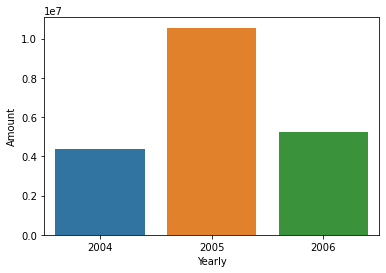

In [60]:
sns.barplot(x= airtickets.Yearly , y = airtickets.Amount)

#### c. Comparison of monthly spend for each product

In [61]:
summ2 = pd.pivot_table(data = cust_spend, index = 'Product', columns = 'Monthly', values = 'Amount', aggfunc = 'sum')
summ2

Monthly,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,14951578.51,9134054.58,7288837.68,5182493.86,8151926.49,2965712.71,1288156.26,1714762.80,1667840.84,550275.04,2741618.42,750156.19
Silver,4206383.62,2087018.37,3909405.83,1902322.65,2140940.01,689537.61,530153.72,293109.82,442803.13,100001.50,691102.63,200537.90


<AxesSubplot:xlabel='Product'>

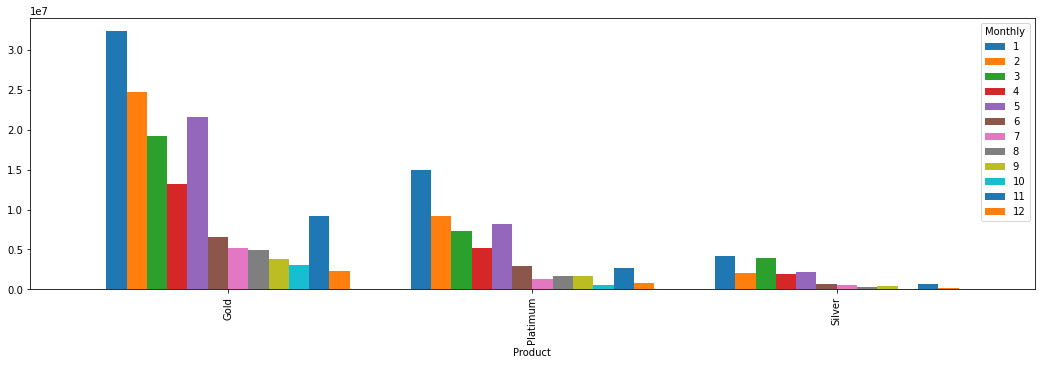

In [62]:
summ2.plot(kind = 'bar', figsize=(18,5),width=0.8)

#### 5. Write user defined PYTHON function to perform the following analysis:

You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [63]:
cust_repay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 0 to 1522
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1499 non-null   float64       
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
 4   No        1500 non-null   float64       
 5   Age       1500 non-null   float64       
 6   City      1500 non-null   object        
 7   Product   1500 non-null   object        
 8   Limit     1500 non-null   float64       
 9   Company   1500 non-null   object        
 10  Segment   1500 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 175.1+ KB


In [64]:
cust_repay.head(2)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,2004-01-12,495414.75,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,2004-01-03,245899.02,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [65]:
cust_repay.isnull().sum()

SL No:      24
Customer    23
Month       23
Amount      23
No          23
Age         23
City        23
Product     23
Limit       23
Company     23
Segment     23
dtype: int64

In [66]:
cust_repay.loc['SL No:'] = cust_repay['SL No:'].fillna(value = 1.0)

In [67]:
cust_repay.dropna(axis = 0, how = 'any', inplace = True)

In [68]:
cust_repay['Month'].isnull().sum()

0

In [69]:
cust_repay.shape

(1499, 11)

In [70]:
cust_repay.head(2)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
1,2.0,A1,2004-01-03,245899.02,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,2004-01-15,259490.06,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [71]:
cust_repay['Monthly'] = cust_repay['Month'].apply(lambda x : x.month)
cust_repay['Yearly'] = cust_repay['Month'].apply(lambda x : x.year)

In [72]:
cust_repay.head(2)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,Monthly,Yearly
1,2.0,A1,2004-01-03,245899.02,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004
2,3.0,A1,2004-01-15,259490.06,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004


In [73]:
cust_repay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 1 to 1499
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1499 non-null   float64       
 1   Customer  1499 non-null   object        
 2   Month     1499 non-null   datetime64[ns]
 3   Amount    1499 non-null   float64       
 4   No        1499 non-null   float64       
 5   Age       1499 non-null   float64       
 6   City      1499 non-null   object        
 7   Product   1499 non-null   object        
 8   Limit     1499 non-null   float64       
 9   Company   1499 non-null   object        
 10  Segment   1499 non-null   object        
 11  Monthly   1499 non-null   int64         
 12  Yearly    1499 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 164.0+ KB


In [74]:
cust_repay.Product.value_counts()

Gold        609
Platimum    570
Silver      320
Name: Product, dtype: int64

In [75]:
cust_repay.Product.replace({'Platimum' : 'Platinum'}, inplace = True)

In [76]:
cust_repay.Product.value_counts()

Gold        609
Platinum    570
Silver      320
Name: Product, dtype: int64

In [77]:
def summary_report(product,timeperiod):
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc['Gold',:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc['Gold',:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc['Silver',:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc['Silver',:]
    elif product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc['Platinum',:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc['Platinum',:]
    return result

In [78]:
summary_report('platinum', 'monthly')

Monthly                      1           2           3           4   \
City       Customer                                                   
BANGALORE  A19         50000.00    10000.00    40000.00    30000.00   
           A37        500008.58   404735.41   200006.00   255805.86   
           A5          60012.00    10002.00    30006.00     7276.60   
           A52        263853.18   234334.70   300006.00   200004.00   
BOMBAY     A33              NaN    30006.00    30006.00         NaN   
           A36        400008.00   427759.59   100002.00   511685.20   
           A4          20002.00    20002.00    10001.00    10001.00   
           A51        282084.48   206147.92   167366.29   100001.00   
           A70              NaN    10001.00         NaN         NaN   
           A71              NaN    10002.00         NaN         NaN   
CALCUTTA   A20         50005.00    20002.00    30003.00    40004.00   
           A34              NaN   198933.36   128854.14   100000.00   
           A40       1749083.51   937643.24  1176947.70         NaN   
           A49         50010.00    70014.00    30006.00    30006.00   
           A69         10000.00         NaN         NaN         NaN   
           A98         10001.00         NaN         NaN         NaN   
           A99         10002.00         NaN         NaN         NaN   
CHENNAI    A38       1655584.31  1365681.76   775994.68   369151.51   
           A47         50000.00    80000.00    30000.00    50000.00   
           A56         36537.90   413912.92  1500854.63   770261.09   
COCHIN     A21         80016.00    50010.00    30006.00    40008.00   
           A3          20000.00    30000.00         NaN    20000.00   
           A35              NaN   300003.00   100001.00   200002.00   
           A41       2089998.54   509624.20   499724.79   147383.00   
           A50        225086.07   229753.02   400000.00   100000.00   
           A54       1154398.99  1149119.64   100719.74  1025491.68   
           A83              NaN         NaN    10002.00         NaN   
DELHI      A53        140309.31   279929.09   100003.00   300009.00   
PATNA      A55        781731.00  1124130.33   483681.85   619774.41   
TRIVANDRUM A39       1565119.57  1212860.65  1141202.46   472407.74   
           A48         40004.00    70007.00    40004.00    50005.00   
           A97         10000.00         NaN         NaN         NaN   

Monthly                      5          6          7          8          9   \
City       Customer                                                           
BANGALORE  A19         20000.00   10000.00   10000.00        NaN   10000.00   
           A37        244585.08  200006.00        NaN  100003.00  125961.96   
           A5          28801.07        NaN        NaN        NaN        NaN   
           A52        100002.00        NaN  100002.00  235509.11        NaN   
BOMBAY     A33         30006.00   10002.00   20004.00   10002.00    2273.98   
           A36        100002.00  100002.00  100002.00  117379.12  200004.00   
           A4          30003.00        NaN        NaN        NaN        NaN   
           A51         74206.01  100001.00  300003.00        NaN  100001.00   
           A70              NaN        NaN        NaN   10001.00        NaN   
           A71              NaN        NaN        NaN        NaN   10002.00   
CALCUTTA   A20              NaN        NaN   30003.00   10001.00        NaN   
           A34        100000.00  100000.00  148053.83  200000.00   81344.52   
           A40       1401293.97        NaN  242107.49  488742.81        NaN   
           A49         60012.00   30006.00   10002.00   10002.00        NaN   
           A69              NaN        NaN   10000.00        NaN        NaN   
           A98              NaN        NaN        NaN        NaN        NaN   
           A99              NaN        NaN        NaN        NaN        NaN   
CHENNAI    A38        981011.33  215272.04        NaN        NaN  345877.86   
     